In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('all_stars_averages.csv')

In [50]:
# create plots directory
import os
if not os.path.exists('plots'):
    os.makedirs('plots')

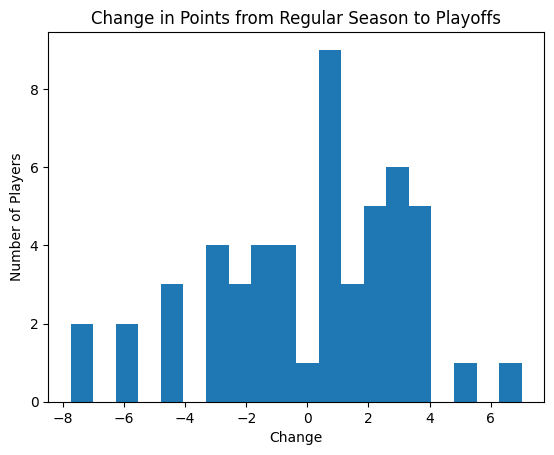

In [51]:
# plot the change in points from regular season to playoffs
# get the all star names
all_stars = df['PLAYER_NAME'].unique()
pt_changes = []

for star in all_stars:
    # get their reg season points and playoff points
    reg_pts = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Regular')]['PTS'].values[0]
    playoff_pts = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Playoffs')]['PTS'].values[0]
    # calculate the percent change
    change = (playoff_pts - reg_pts)
    pt_changes.append(change)

# plot these percent changes
plt.hist(pt_changes, bins=20)
plt.title('Change in Points from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Number of Players')
plt.savefig('plots/pt_changes_hist.png')
plt.show()

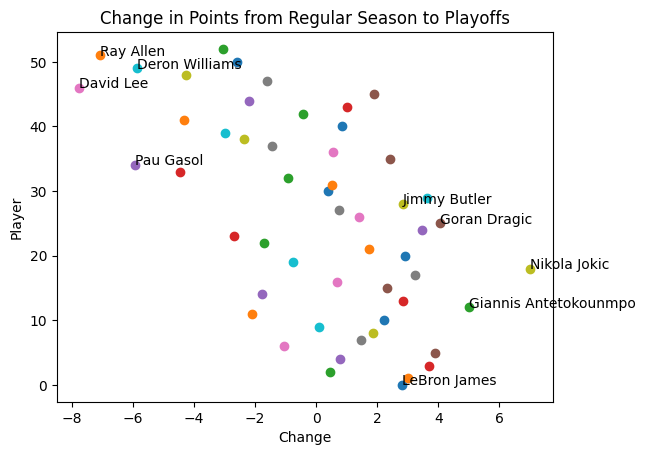

In [52]:
# now plot it for each player

# only label the outlier points
outlier_indices = [i for i, x in enumerate(pt_changes) if x > 4 or x < -5]
outlier_names = [all_stars[i] for i in outlier_indices]

# also label jimmy butler aand lebron james
outlier_names.append('Jimmy Butler')
outlier_names.append('LeBron James')

for i, star in enumerate(all_stars):
    plt.scatter(pt_changes[i], i)
    if star in outlier_names:
        plt.annotate(star, (pt_changes[i], i))

plt.title('Change in Points from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Player')
plt.savefig('plots/pt_changes_scatter.png')
plt.show()

In [53]:
# now do the same analysis for PLUS_MINUS
pm_changes = []

for star in all_stars:
    # get their reg season plus minus and playoff plus minus
    reg_pm = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Regular')]['PLUS_MINUS'].values[0]
    playoff_pm = df.loc[(df['PLAYER_NAME'] == star) & (df['SEASON_TYPE'] == 'Playoffs')]['PLUS_MINUS'].values[0]
    # calculate the percent change
    change = (playoff_pm - reg_pm)
    pm_changes.append(change)

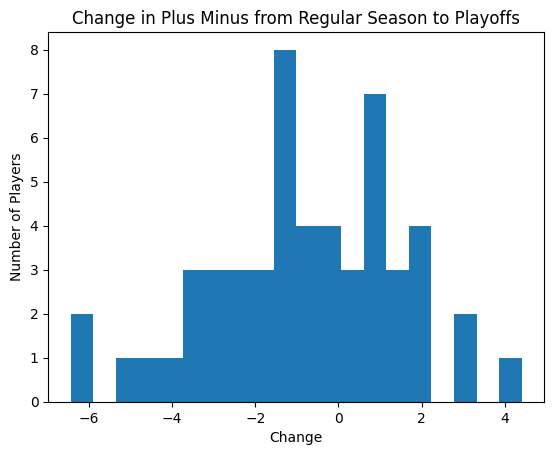

In [54]:
# plot these percent changes
plt.hist(pm_changes, bins=20)
plt.title('Change in Plus Minus from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Number of Players')
plt.savefig('plots/pm_changes_hist.png')
plt.show()

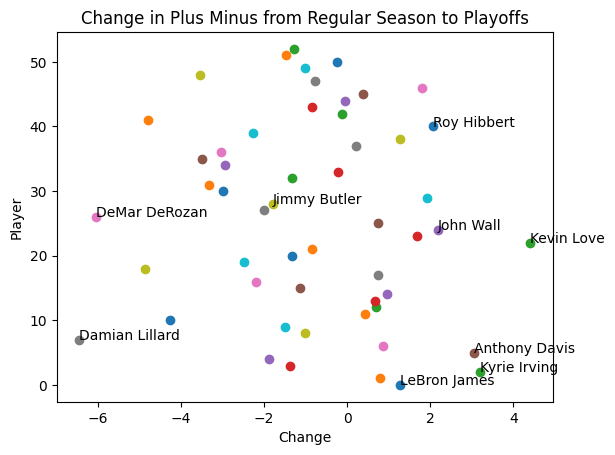

In [55]:
# now plot it for each player
# only label the outlier points, jimmy butler, and lebron james
outlier_indices = [i for i, x in enumerate(pm_changes) if x > 2 or x < -5]
outlier_names = [all_stars[i] for i in outlier_indices]

# also label jimmy butler aand lebron james
outlier_names.append('Jimmy Butler')
outlier_names.append('LeBron James')

for i, star in enumerate(all_stars):
    plt.scatter(pm_changes[i], i)
    if star in outlier_names:
        plt.annotate(star, (pm_changes[i], i))

plt.title('Change in Plus Minus from Regular Season to Playoffs')
plt.xlabel('Change')
plt.ylabel('Player')
plt.savefig('plots/pm_changes_scatter.png')
plt.show()